In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

import numpy as np

import matplotlib.colors as mcolors
import dateutil
import datetime
import locale

In [2]:
locale.setlocale(locale.LC_ALL, 'es_CL.utf8')

'es_CL.utf8'

In [3]:
df = pd.read_csv("COVID19CL_accumulated.csv", index_col=0, parse_dates=True)

df.iloc[-10:] #show last row,, in this case, the latest recorded data


Arica y Parinacota  Tarapacá  Antofagasta  Atacama  Coquimbo  \
FECHA                                                                      
2020-05-13                 359       615         1216      139       153   
2020-05-14                 363       682         1277      140       165   
2020-05-15                 368       779         1331      143       180   
2020-05-16                 377       845         1429      146       187   
2020-05-17                 378       975         1505      149       194   
2020-05-18                 398      1056         1589      157       212   
2020-05-19                 422      1109         1648      158       239   
2020-05-20                 424      1139         1731      163       263   
2020-05-21                 453      1246         1778      168       268   
2020-05-22                 471      1393         1841      175       281   

            Valparaíso  Metropolitana  O’Higgins  Maule  Ñuble  Biobío  \
FECHA                                                                    
2020-05-13        1123          24965        248    485    839     975   
2020-05-14        1213          27216        295    519    849     995   
2020-05-15        1312          29276        323    540    885    1036   
2020-05-16        1365          30794        329    551    921    1074   
2020-05-17        1474          32684        366    573    942    1099   
2020-05-18        1553          34451        418    602    985    1144   
2020-05-19        1639          37591        442    640    988    1172   
2020-05-20        1770          41179        455    680   1011    1224   
2020-05-21        1887          44641        465    731   1020    1263   
2020-05-22        2020          48350        492    782   1025    1311   

            Araucanía  Los Ríos  Los Lagos  Aysén  Magallanes  \
FECHA                                                           
2020-05-13       1495       212        628      8         921   
2020-05-14       1536       214        633      8         935   
2020-05-15       1564       219        641      8         937   
2020-05-16       1587       219        644      8         952   
2020-05-17       1606       220        647      8         961   
2020-05-18       1639       224        652      8         971   
2020-05-19       1666       229        656      8         972   
2020-05-20       1680       247        666      8         977   
2020-05-21       1715       258        693      8         987   
2020-05-22       1737       262        717      8         992   

            Total Acumulado  Total Recuperados  Total Mortalidad  \
FECHA                                                              
2020-05-13            34381              14865               346   
2020-05-14            37040              15655               368   
2020-05-15            39542              16614               394   
2020-05-16            41428              18014               421   
2020-05-17            43781              19213               450   
2020-05-18            46059              20165               478   
2020-05-19            49579              21507               509   
2020-05-20            53617              22504               544   
2020-05-21            57581              23992               589   
2020-05-22            61857              25342               630   

            Total Activos  
FECHA                      
2020-05-13          19170  
2020-05-14          21017  
2020-05-15          22534  
2020-05-16          22993  
2020-05-17          24118  
2020-05-18          25416  
2020-05-19          27563  
2020-05-20          30569  
2020-05-21          33000  
2020-05-22          35885

In [4]:
date_begin = df.index.values.min()
date_end = df.index.values.max()
date_begin_obj = dateutil.parser.parse(np.datetime_as_string(date_begin))
date_end_obj = dateutil.parser.parse(np.datetime_as_string(date_end))
date_begin_int = int(date_begin_obj.strftime('%Y%m%d'))
date_end_int = int(date_end_obj.strftime('%Y%m%d'))
date_prev_obj = date_end_obj - datetime.timedelta(days=1)

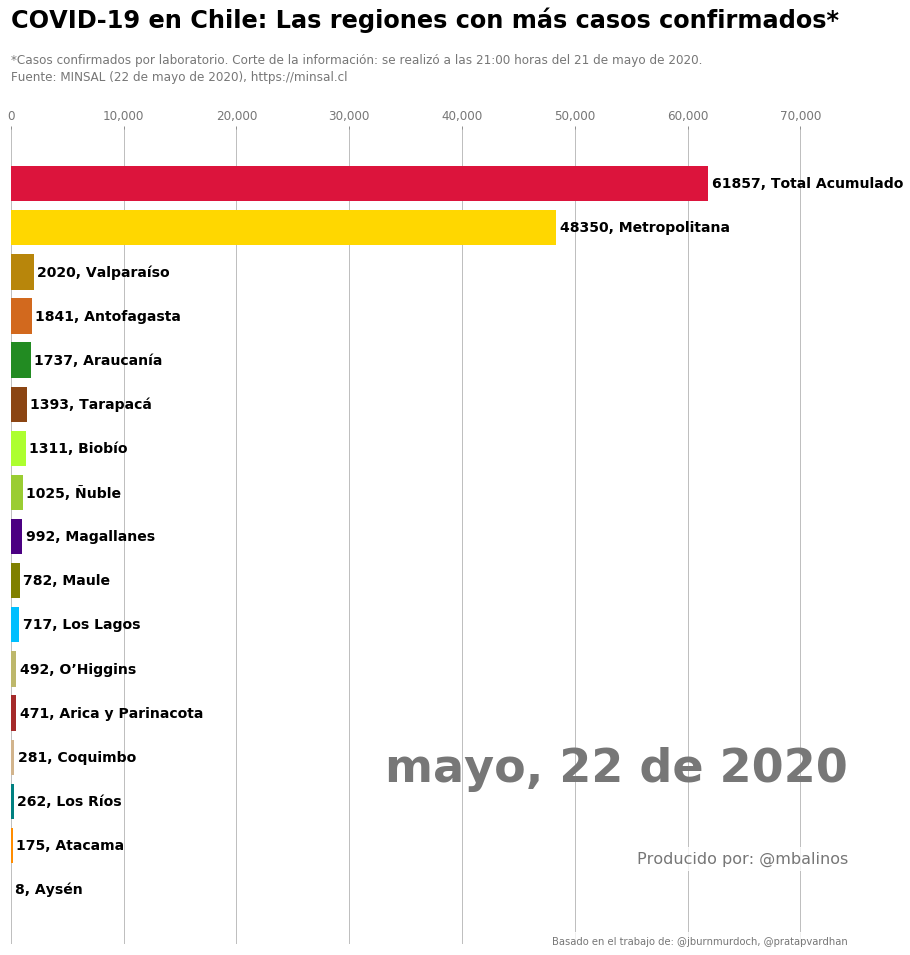

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
#color_list=list(mcolors.CSS4_COLORS.values())[0:17]
color_list=['brown','saddlebrown','chocolate','darkorange','tan','darkgoldenrod','gold','darkkhaki',
            'olive','yellowgreen','greenyellow','forestgreen','teal','deepskyblue','royalblue','indigo','crimson']

regiones = ['Arica y Parinacota','Tarapacá','Antofagasta','Atacama','Coquimbo','Valparaíso','Metropolitana',
            'O’Higgins','Maule','Ñuble','Biobío','Araucanía','Los Ríos','Los Lagos','Aysén','Magallanes','Total Acumulado']
colors = dict(zip(regiones,color_list))


def draw_barchart(current_day_obj):
    current_day = str(current_day_obj)
    date_obj = dateutil.parser.parse(current_day)
    dff = df.loc[current_day, regiones].sort_values(ascending=True)
    ax.clear()
    ax.barh(range(0,17), dff, color=[colors[x] for x in dff.keys()])
    dx = dff.max()/200
    xmax = df.loc[str(date_end_int)].max()*1.2
    
    ax.set_autoscale_on(False)
    ax.set_xlim(0, xmax)
    
    for i, (value, name) in enumerate(zip(dff, dff.keys())):
        ax.text(value+dx, i,     str(int(value))+', '+name,           size=14, weight=600, ha='left', va='center')        
    ax.text(1, 0.2, date_obj.strftime('%B, %d de %Y'), transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.08, '*Casos confirmados por laboratorio. Corte de la información: se realizó a las 21:00 horas del '+date_prev_obj.strftime('%d de %B de %Y.'), transform=ax.transAxes, size=12, color='#777777')
    ax.text(0, 1.06, 'Fuente: MINSAL '+date_end_obj.strftime('(%d de %B de %Y)')+', https://minsal.cl', transform=ax.transAxes, size=12, color='#777777')
    
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01, tight=False)
    ax.grid(which='major', axis='x', linestyle='-')
    
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'COVID-19 en Chile: Las regiones con más casos confirmados*',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0.1, 'Producido por: @mbalinos', transform=ax.transAxes, size=16, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.text(1, 0, 'Basado en el trabajo de: @jburnmurdoch, @pratapvardhan', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(date_end_obj)

plt.savefig('COVID19CL_REG_current.png')

<IPython.core.display.HTML object>

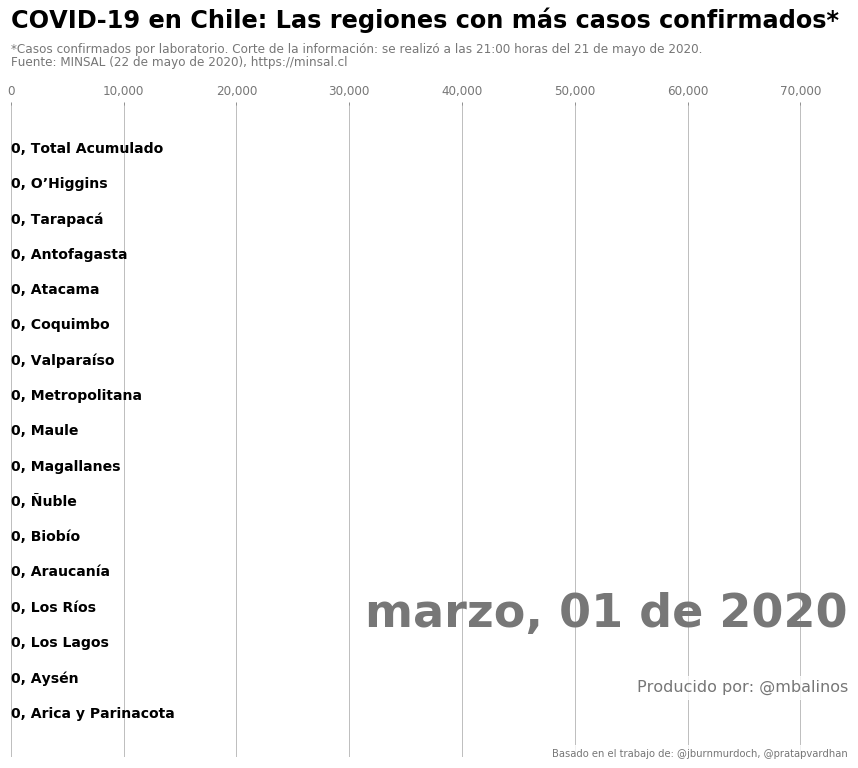

In [6]:
fig, ax = plt.subplots(figsize=(15, 12))
animator = animation.FuncAnimation(fig, draw_barchart, frames=pd.date_range(start=date_begin_obj,end=date_end_obj))
HTML(animator.save('COVID19CL_REG_current.gif', writer='imagemagick', fps=1))
#HTML(animator.to_jshtml(fps=1))
#HTML(animator.to_html5_video())
# or use animator.to_html5_video() or animator.save() 

![gif](https://gitlab.com/mbalinos/covid-19-en-chile/-/raw/master/COVID19CL_REG_current.gif)
